In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

In [44]:
df = pd.read_csv('data_bai2.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head(10)

,STT,Họ và tên,MSSV,Giới tính,Khóa,Khoa,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,Không có,Không có,Không có
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,Không có,Không có,Không có
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,Không có,Không có,Không có
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,Không có ý kiến,Tốt,Nâng cao hệ thống máy tính
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,"Phòng trang bị thêm máy, Có thể cho thêm ghế ngồi",Cố hiền dễ thương,Không có
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,Thay thế máy tính mới,Tốt,Không có
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,Không,Vui vẻ,Không
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,Thể bố trí thêm nhiều bàn tự học hơn,Thân thiện,Không
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,Không có,Không có,Không có
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,Không có,"Nghiêm túc, quản lý tốt",Không có


## Mô tả về dữ liệu:
- Dữ liệu là những thông tin thu được sau khi thực hiện cuộc khảo sát đối với sinh viên trường **Đại học Công nghiệp Thành phố Hồ Chí Minh**, với ý nghĩa các cột cụ thể như sau:
    + *STT*: số thứ tự
    + *Họ và tên*: họ và tên đầy đủ của sinh viên được khảo sát
    + *MSSV*: mã số sinh viên của sinh viên được khảo sát
    + *Giới tính*: giới tính của sinh viên được khảo sát (****1: Nam; 2: Nữ****)
    + *Khóa*: khóa mà sinh viên được khảo sát đang theo học (****1: K17; 2: K18; 3: K19; 4: K20; 5: Khác****)
    + *Khoa*: khoa mà sinh viên được khảo sát đang theo học
    + Các cột *1-10* (các câu hỏi định lượng): các câu hỏi khảo sát về mức độ đồng ý của sinh viên được thiết kế theo thang đo Likert với số điểm từ *1 đến 5* ứng với các mức độ từ **Hoàn toàn không đồng ý** đến **Hoàn toàn đồng ý**. Các câu hỏi này được chia vào *2* nhóm: 
        * **Nhóm 1** (các câu hỏi *1-5*): khảo sát về mức độ hài lòng của sinh viên về **Các thiết bị điện tử và kết nối mạng**
        * **Nhóm 2** (các câu hỏi *6-10*): khảo sát về mức độ hài lòng của sinh viên về **Không gian thư viện**
    + Các cột *11-13* (các câu hỏi định tính): các câu hỏi với câu trả lời dạng text
- Trong bộ dữ liệu này:
    + Các cột *Họ và tên, MSSV, Giới tính, Khóa, Khoa* là các cột **đặc trưng cá nhân** của từng sinh viên
    + Các cột *1-13* là các *biến quan sát* dùng để **phân tích** và **trực quan hóa dữ liệu**

In [45]:
"""Tổng số phiếu đã khảo sát"""
len(df)

60

In [46]:
"""Một số mô tả cơ bản khác"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   STT        60 non-null     int64 
 1   Họ và tên  60 non-null     object
 2   MSSV       60 non-null     int64 
 3   Giới tính  60 non-null     int64 
 4   Khóa       60 non-null     int64 
 5   Khoa       60 non-null     object
 6   1          60 non-null     int64 
 7   2          60 non-null     int64 
 8   3          60 non-null     int64 
 9   4          60 non-null     int64 
 10  5          60 non-null     int64 
 11  6          60 non-null     int64 
 12  7          60 non-null     int64 
 13  8          60 non-null     int64 
 14  9          60 non-null     int64 
 15  10         60 non-null     int64 
 16  11         60 non-null     object
 17  12         60 non-null     object
 18  13         60 non-null     object
dtypes: int64(14), object(5)
memory usage: 9.0+ KB


In [47]:
"""Các khoa xuất hiện trong bộ dữ liệu khảo sát"""
print(df['Khoa'].unique())

['Động lực' 'Thương mại du lịch' 'Quản trị kinh doanh' 'Kế toán'
 'Công nghệ điện' 'Công nghệ thông tin' 'Công nghệ nhiệt'
 'Công nghệ điện tử' 'Ngoại ngữ' 'Công nghệ động lực']


## Các thống kê cơ bản

In [48]:
#  Thực hiện đổi tên cột
df.columns = ['stt', 'ho_ten', 'mssv', 'gioi_tinh', 'khoa_hoc', 'khoa', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13']
df.head(10)

,stt,ho_ten,mssv,gioi_tinh,khoa_hoc,khoa,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,Không có,Không có,Không có
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,Không có,Không có,Không có
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,Không có,Không có,Không có
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,Không có ý kiến,Tốt,Nâng cao hệ thống máy tính
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,"Phòng trang bị thêm máy, Có thể cho thêm ghế ngồi",Cố hiền dễ thương,Không có
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,Thay thế máy tính mới,Tốt,Không có
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,Không,Vui vẻ,Không
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,Thể bố trí thêm nhiều bàn tự học hơn,Thân thiện,Không
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,Không có,Không có,Không có
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,Không có,"Nghiêm túc, quản lý tốt",Không có


In [49]:
def chuyen_doi(data):
    khong_pattern = re.compile(r'Không*\.')
    # Nếu câu trả lời có chứa từ 'Không' thì đó là ý kiến trung lập
    if re.match(khong_pattern, data):
        return 3
    
    # Dùng textblob để phân tích cảm xúc
    ptich = TextBlob(data)
    cxuc = ptich.sentiment.polarity

    # Chuyển đổi sang thang điểm Likert
    if cxuc < -.5:
        return 1
    if -.5 <= cxuc < -.1:
        return 2
    if -.1 <= cxuc < .1:
        return 3
    if .1 <= cxuc < .5:
        return 4
    
    return 5

In [50]:
for col in df.iloc[:, 16:18]:
    df[col] = df[col].apply(chuyen_doi)

In [63]:
df

,stt,ho_ten,mssv,gioi_tinh,khoa_hoc,khoa,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,3,3,Không có
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,3,3,Không có
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,3,3,Không có
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,3,3,Nâng cao hệ thống máy tính
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,3,3,Không có
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,3,3,Không có
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,3,3,Không
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,3,3,Không
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,3,3,Không có
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,3,3,Không có


#### Thống kê về giới tính của đối tượng tham gia khảo sát

In [52]:
# Đếm số lượng sinh viên theo giới tính
gender_count = df.gioi_tinh.value_counts().reset_index()
gender_count.columns = ['gioi_tinh', 'so_luong']
gender_count.gioi_tinh = gender_count.gioi_tinh.replace({1: 'Nam', 2: 'Nữ'})
gender_count

,gioi_tinh,so_luong
0,Nam,45
1,Nữ,15


In [69]:
def custom_autopct(pct):
    return '%1.1f%%' % pct if pct > 0 else ''

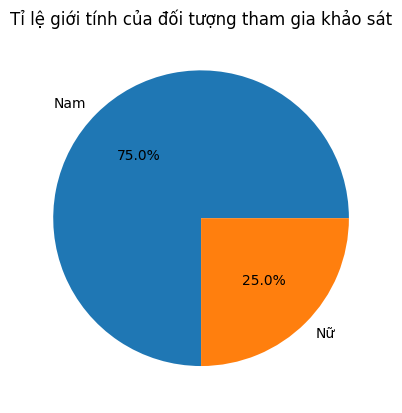

In [70]:
plt.pie(gender_count.so_luong, labels=gender_count.gioi_tinh, autopct=custom_autopct)
plt.title('Tỉ lệ giới tính của đối tượng tham gia khảo sát')
plt.show();

#### Thống kê về khóa học của đối tượng tham gia khảo sát

In [54]:
# Khai báo toàn bộ các khóa học trong khảo sát
khoa_hoc_all = pd.DataFrame({'khoa_hoc': ['K17', 'K18', 'K19', 'K20', 'Khac']})

# Đếm số lượng sinh viên theo khóa học thu được sau khi khảo sát
khoa_hoc_count = df.khoa_hoc.value_counts().reset_index()
khoa_hoc_count.columns = ['khoa_hoc', 'so_luong']
khoa_hoc_count.khoa_hoc = khoa_hoc_count.khoa_hoc.replace({1: 'K17', 2: 'K18', 3: 'K19', 4: 'K20', 5: 'Khac'})
final_count = pd.merge(khoa_hoc_all, khoa_hoc_count, on='khoa_hoc', how='left').fillna(0).astype({'so_luong': int})
final_count

,khoa_hoc,so_luong
0,K17,0
1,K18,3
2,K19,54
3,K20,3
4,Khac,0


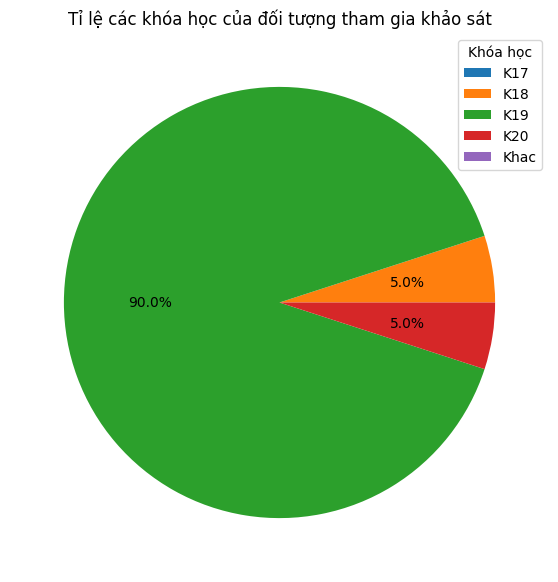

In [71]:
plt.figure(figsize=(7, 7))
plt.pie(final_count.so_luong, labels=None, autopct=custom_autopct)
plt.title('Tỉ lệ các khóa học của đối tượng tham gia khảo sát')
plt.legend(final_count.khoa_hoc, title='Khóa học')
plt.show();

#### Thống kê dữ liệu các câu hỏi

In [67]:
likert = pd.DataFrame({'diem': [1, 2, 3, 4, 5]})
likert_descript = [
    '1: Hoàn toàn không đồng ý',
    '2: Không đồng ý',
    '3: Bình thường',
    '4: Đồng ý',
    '5: Hoàn toàn đồng ý'
]
likert_quest = {
        'q1': 'Câu 1: Thư viện có đủ số lượng máy tính để đáp ứng đủ nhu cầu sử dụng của sinh viên.',
        'q2': 'Câu 2: Các máy tính trong thư viện hoạt động tốt, không bị giật lag khi sử dụng.', 
        'q3': 'Câu 3: Bàn ghế và ổ cắm điện tại khu vực máy tính được bố trí hợp lý, thuận tiện cho sinh viên học tập.', 
        'q4': 'Câu 4: Tình trạng mạng Wifi trong thư viện hoạt động ổn định và dễ dàng truy cập.',
        'q5': 'Câu 5: Hệ thống máy lạnh trong thư viện hoạt động tốt.',
        'q6': 'Câu 6: Không gian thư viện đủ rộng có thể phục vụ cho số lượng lớn sinh viên cùng lúc.', 
        'q7': 'Câu 7: Môi trường học tập trong thư viện yên tĩnh, giúp sinh viên tập trung hơn khi học.',
        'q8': 'Câu 8: Số lượng phòng họp nhóm đáp ứng được nhu cầu làm việc nhóm của sinh viên.',
        'q9': 'Câu 9: Cơ sở vật chất trong các phòng họp nhóm ở thư viện luôn được trang bị đầy đủ.',
        'q10': 'Câu 10: Khu vực ngồi nghỉ của sinh viên tại thư viện được bố trí hợp lý.',
        'q11': 'Câu 11: Theo bạn, thư viện trường Đại học Công nghiệp Thành phố Hồ Chí Minh cần cải thiện những gì để nâng cao chất lượng dịch vụ?',
        'q12': 'Câu 12: Bạn có nhận xét thế nào về chất lượng phục vụ của cán bộ thư viện trường Đại học Công nghiệp Thành phố Hồ Chí Minh?'
        }

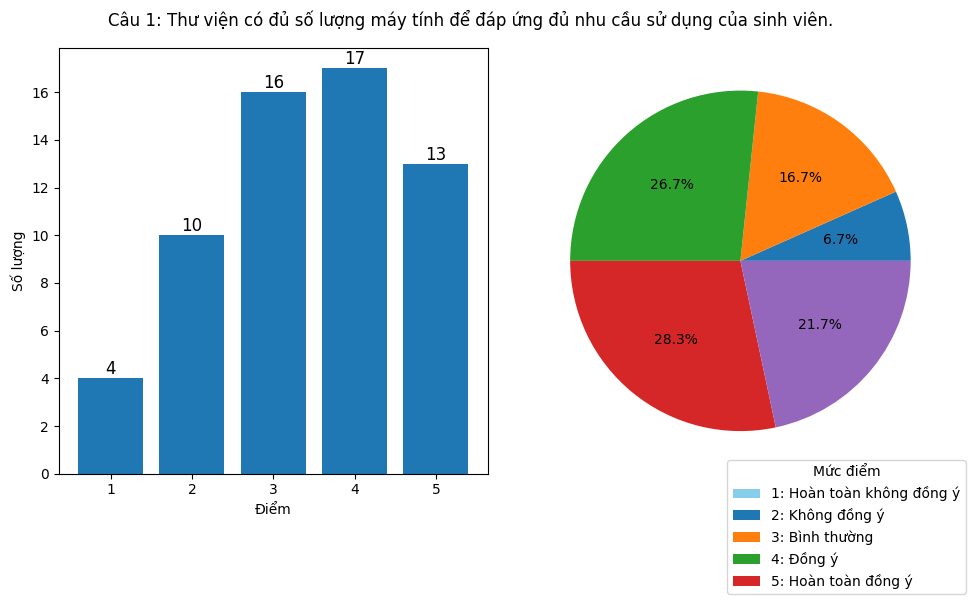

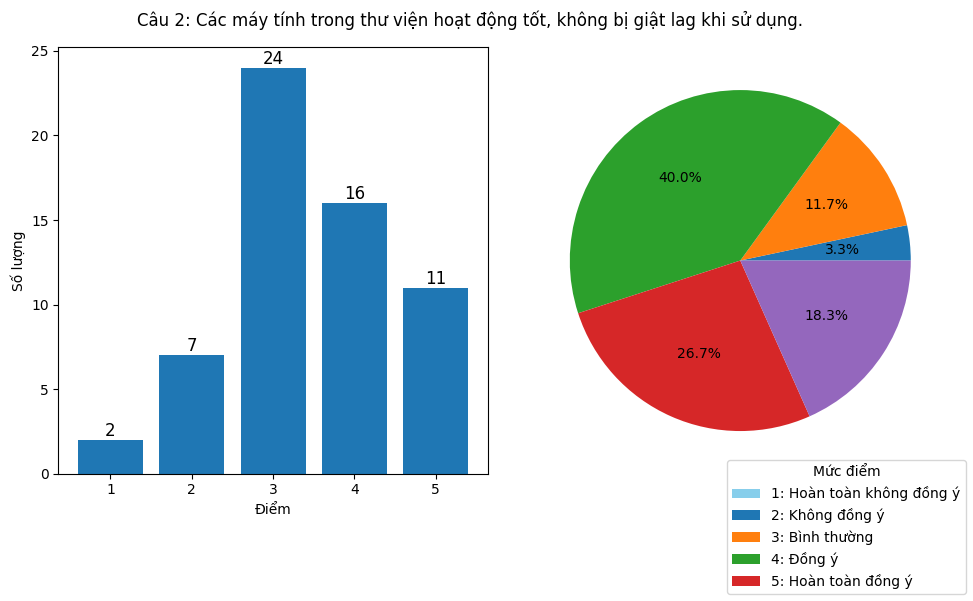

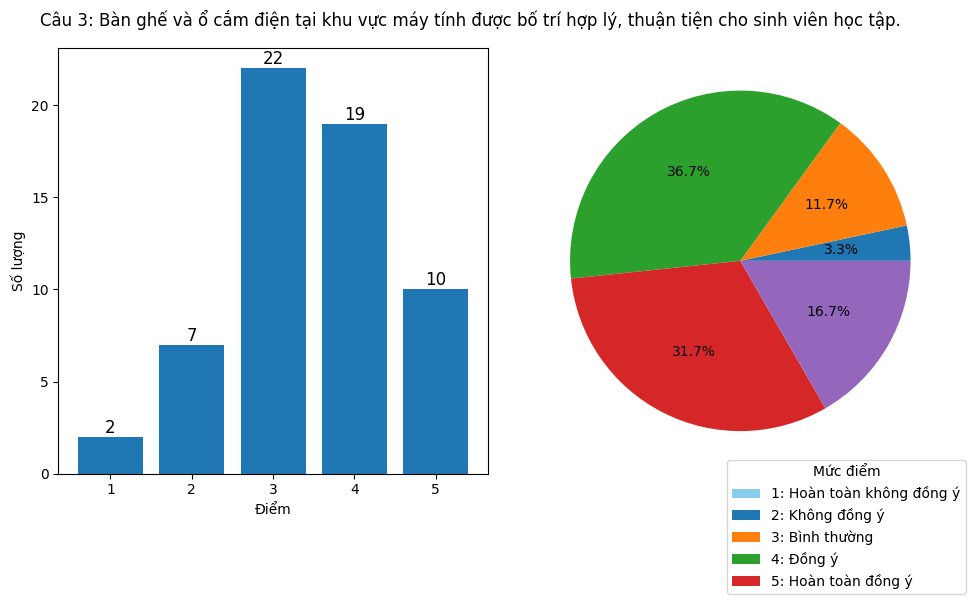

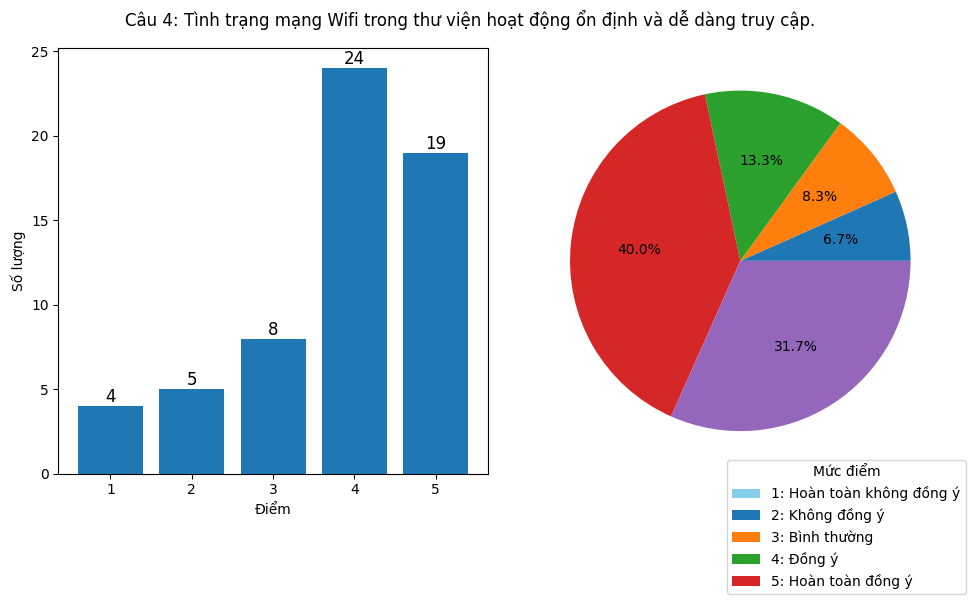

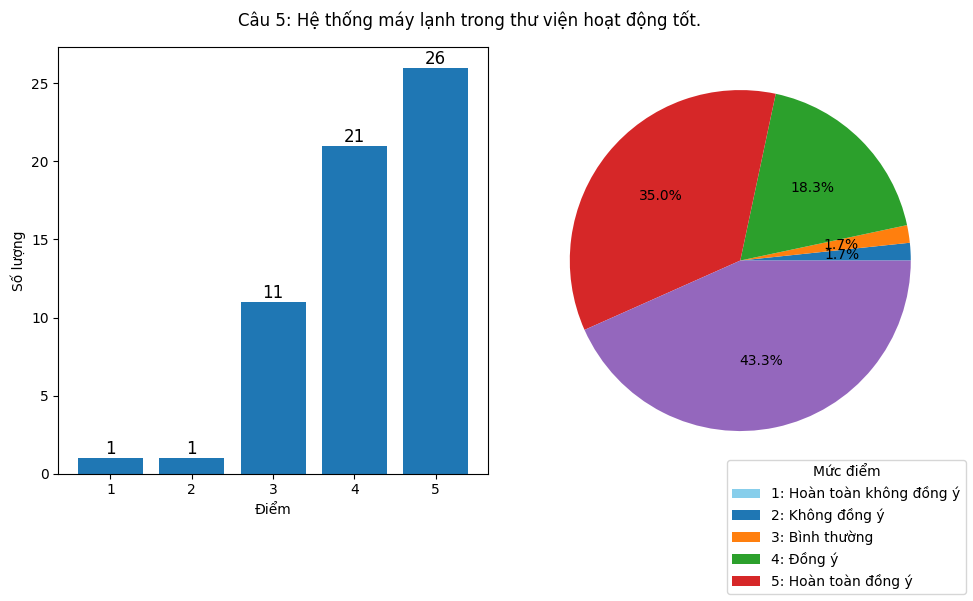

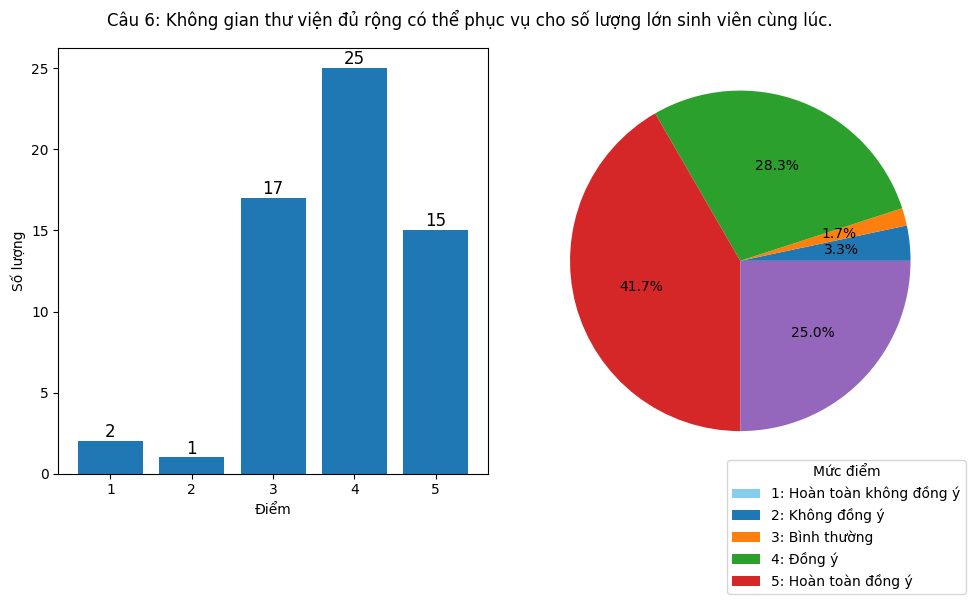

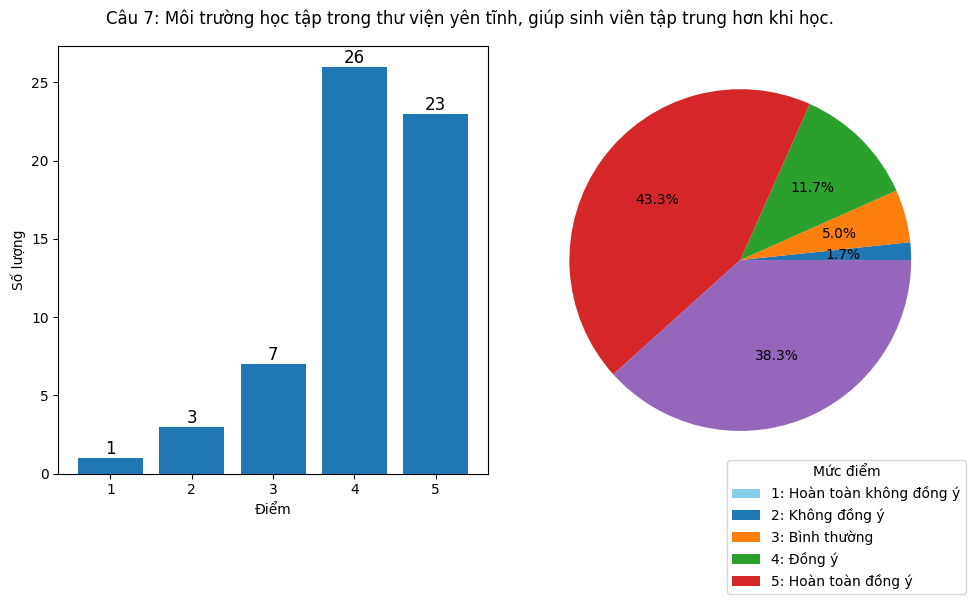

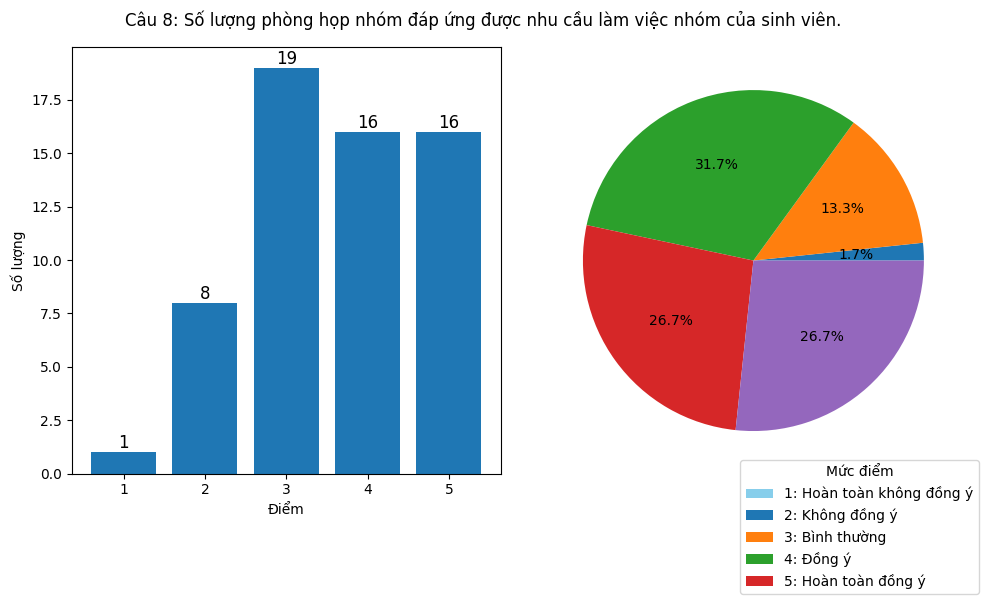

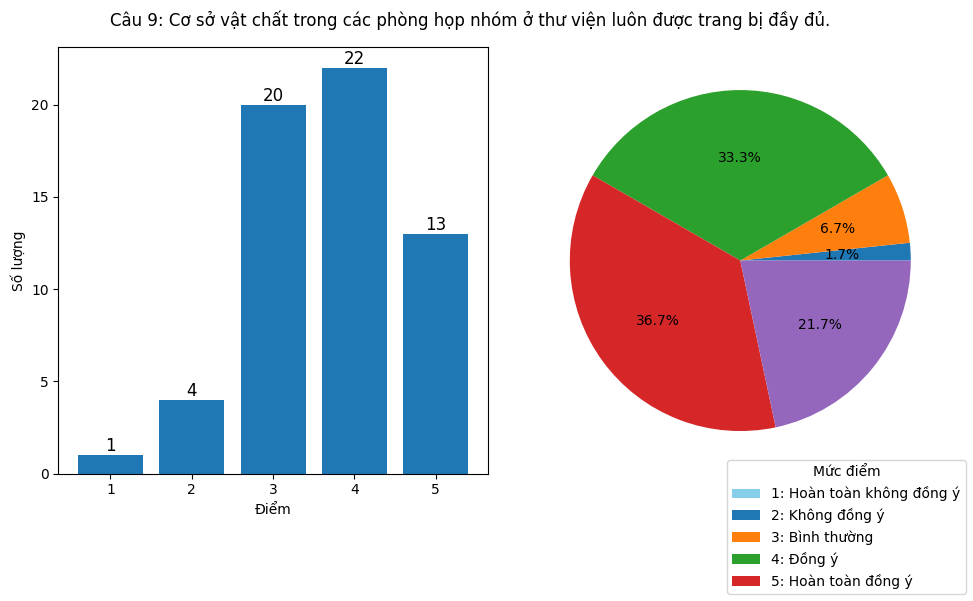

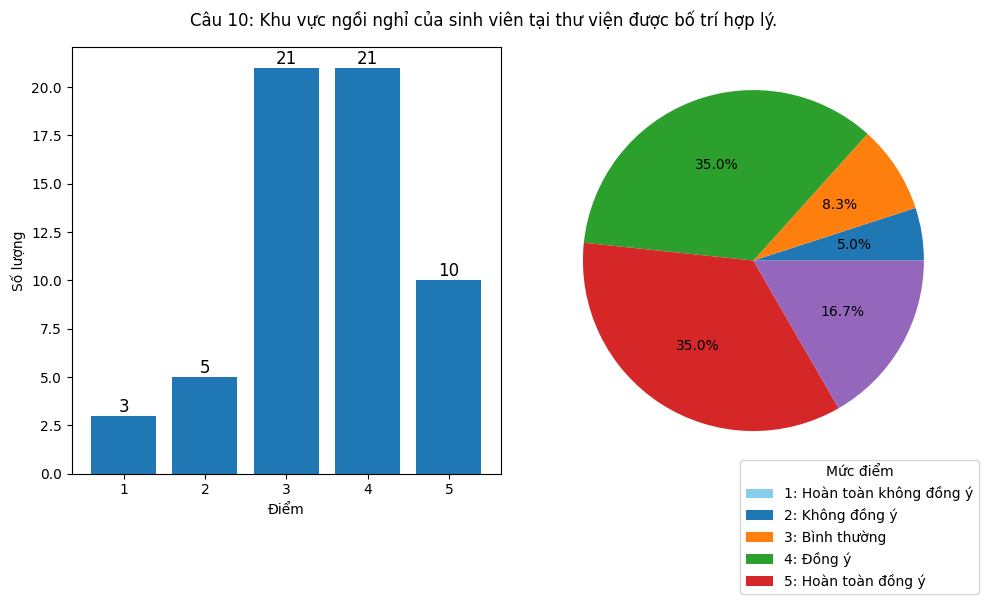

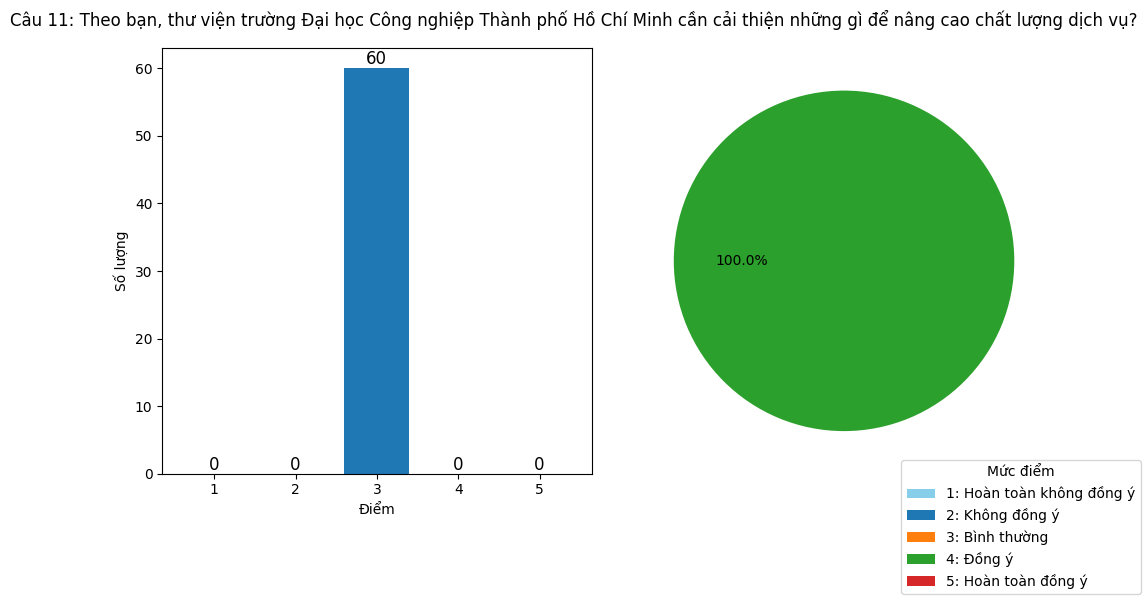

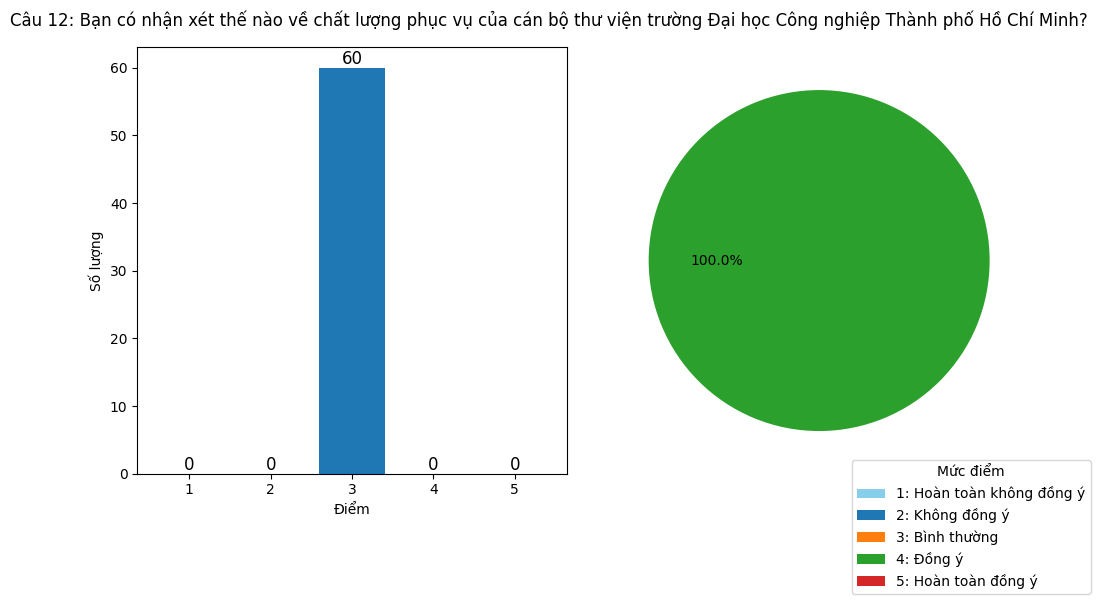

In [68]:
# Đếm số lượng của từng mức điểm trong các câu hỏi
for Q_no, ques_statement in likert_quest.items():
    Q_count = df[Q_no].value_counts().reset_index()
    Q_count.columns = ['diem', 'so_luong']
    Q_count = pd.merge(likert, Q_count, on='diem', how='left').fillna(0).astype({'so_luong': int})

    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(ques_statement)
    bars = ax[0].bar(Q_count.diem, Q_count.so_luong)
    ax[0].set(xlabel='Điểm', ylabel='Số lượng', position=[.1, 0, .4, .2])

    for bar in bars:
        height = bar.get_height()
        ax[0].text(
            bar.get_x() + bar.get_width() / 2,  
            height,                         
            f'{height}',                        
            ha='center',                        
            va='bottom',                        
            fontsize=12
        )

    wedges, texts, autotexts = ax[1].pie(Q_count.so_luong, autopct=custom_autopct, labels=None)

    all_handles = [
        plt.Rectangle((0,0), 1, 1, fc='skyblue'),  
        *wedges  
    ]
    labels = likert_descript
    fig.legend(
        all_handles,
        labels,
        title='Mức điểm', 
        loc='lower right'
    )

    plt.tight_layout()
    plt.show();

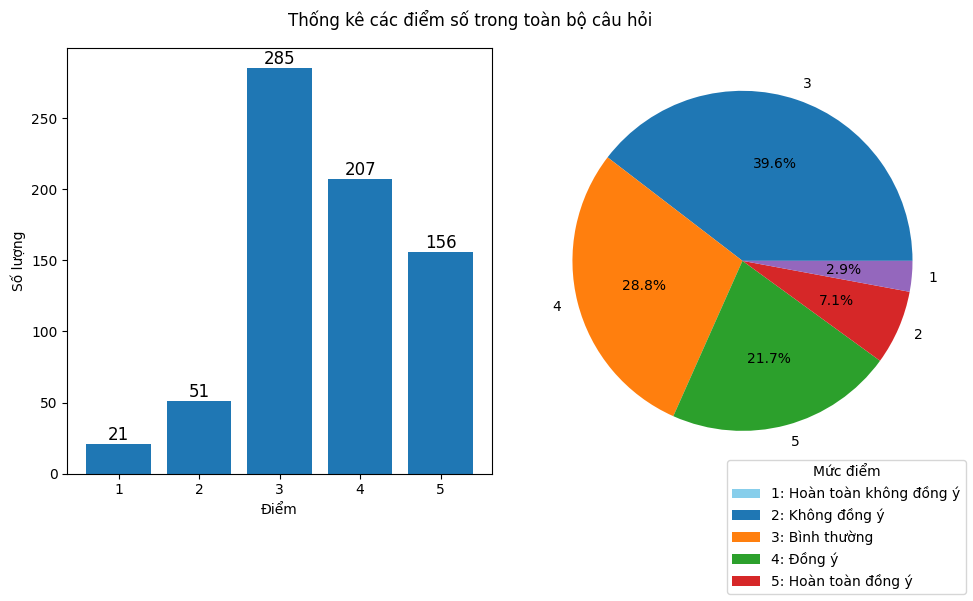

In [72]:
# Đếm số lượng của từng mức điểm trong toàn bộ câu hỏi
df_ques = df.iloc[:, 6:18]
tmp = pd.melt(df_ques)
score_whole_ques_count = tmp['value'].value_counts().reset_index()


fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Thống kê các điểm số trong toàn bộ câu hỏi')
bars = ax[0].bar(score_whole_ques_count.value, score_whole_ques_count['count'])
ax[0].set(xlabel='Điểm', ylabel='Số lượng', position=[.1, 0, .4, .2])

for bar in bars:
    height = bar.get_height()
    ax[0].text(
        bar.get_x() + bar.get_width() / 2,  
        height,                         
        f'{height}',                        
        ha='center',                        
        va='bottom',                        
        fontsize=12
        )

wedges, texts, autotexts = ax[1].pie(score_whole_ques_count['count'], autopct='%1.1f%%', labels=score_whole_ques_count.value)

all_handles = [
    plt.Rectangle((0,0), 1, 1, fc='skyblue'),  
    *wedges  
]
labels = likert_descript
fig.legend(
    all_handles,
    labels,
    title='Mức điểm', 
    loc='lower right'
)

plt.tight_layout()
plt.show();

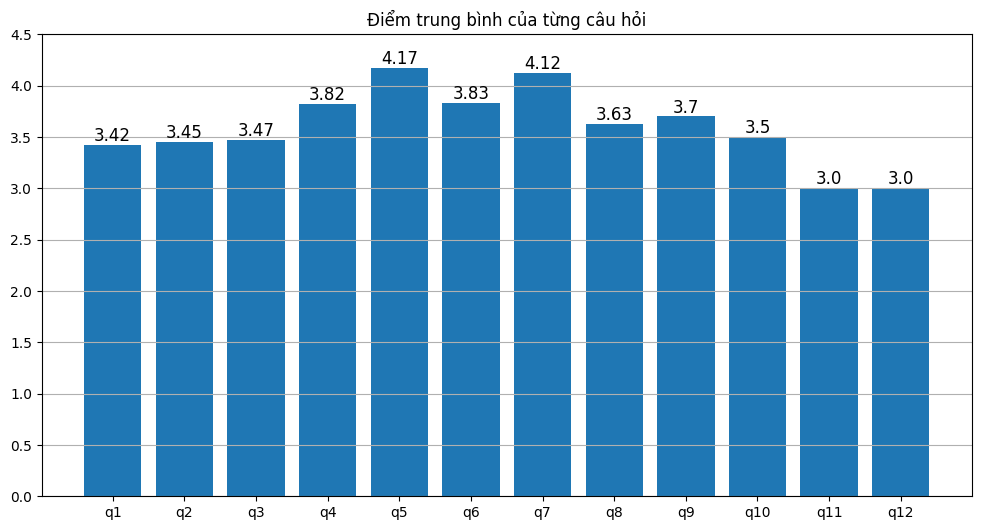

In [124]:
# Điểm số trung bình của các câu hỏi
avg_score = df_ques.mean().round(2).reset_index().rename(columns={'index': 'cau_hoi', 0: 'diem_tb'})
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_score['cau_hoi'], avg_score['diem_tb'])
plt.title('Điểm trung bình của từng câu hỏi')
plt.grid(axis='y')
plt.yticks(np.arange(0, 5, .5))

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                         
        f'{height}',                        
        ha='center',                        
        va='bottom',                        
        fontsize=12
        )
plt.show();

#### Tìm mối tương quan giữa các câu hỏi và kết quả

In [74]:
# Xác định mức độ hài lòng của sinh viên đối với thư viện thông qua các câu hỏi 1 đến 10
df['do_hai_long_chung'] = round(df_ques.mean(axis=1), 3)
df.head(10)

,stt,ho_ten,mssv,gioi_tinh,khoa_hoc,khoa,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,do_hai_long_chung
0,1,Phạm Tiến Hưng,23632401,1,3,Động lực,4,3,4,3,5,4,4,3,3,3,3,3,Không có,3.500
1,2,Lê Ngọc Trường Giang,24697331,1,4,Thương mại du lịch,3,3,4,3,5,4,5,5,4,5,3,3,Không có,3.917
2,3,Nguyễn Thị Trúc Hà,24696461,2,4,Quản trị kinh doanh,3,4,2,5,4,4,4,2,4,3,3,3,Không có,3.417
3,4,Mohammad Hanufi,23704721,1,3,Quản trị kinh doanh,3,3,3,4,3,4,5,3,4,4,3,3,Nâng cao hệ thống máy tính,3.500
4,5,Lê Minh Thắng,23687491,1,3,Quản trị kinh doanh,3,3,3,4,5,3,4,3,3,3,3,3,Không có,3.333
5,6,Đoàn Ngọc Mỹ Tâm,23640421,2,3,Quản trị kinh doanh,5,5,5,5,5,5,5,5,5,5,3,3,Không có,4.667
6,7,Phùng Thị Như Quỳnh,23640511,2,3,Quản trị kinh doanh,5,5,4,5,4,4,5,4,5,4,3,3,Không,4.250
7,8,Võ Lê Ánh Thu,23715711,2,3,Quản trị kinh doanh,4,5,5,5,5,4,5,5,5,4,3,3,Không,4.417
8,9,Đăng Thị Thúy Ngân,24707631,2,4,Kế toán,4,4,3,2,5,5,4,4,4,4,3,3,Không có,3.750
9,10,Huỳnh Thị Mỹ Duyên,23722431,2,3,Thương mại du lịch,4,5,4,5,4,4,4,4,5,4,3,3,Không có,4.083


In [123]:
# Tính độ tương quan Pearson giữa các câu hỏi với độ hài lòng chung
df_for_corr = pd.concat([df_ques, df[['do_hai_long_chung']]], axis=1)
corr_mat = pd.DataFrame(df_for_corr.corr().loc['do_hai_long_chung'].drop('do_hai_long_chung'))
corr_mat.columns = ['he_so']

In [87]:
df_for_corr.iloc[:, 10:12].var()
# Vì phương sai của câu 11 và câu 12 bằng 0 nên không thể sử dụng để phân tích tương quan

q11    0.0
q12    0.0
dtype: float64

<Axes: >

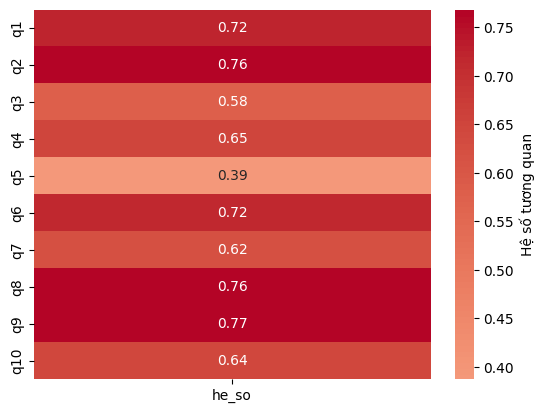

In [109]:
sns.heatmap(corr_mat.iloc[:-2, :], annot=True, cmap='coolwarm', center=0, cbar_kws={'label': 'Hệ số tương quan'})

#### Các yếu tố quan trọng ảnh hưởng đến độ hài lòng của sinh viên

In [127]:
# Top 3 câu hỏi có điểm số trung bình cao nhất
top3_importance = corr_mat.sort_values(by='he_so', ascending=False)[:3]
top3_importance

,he_so
q9,0.768290
q2,0.764165
q8,0.762602
